In [2]:
import numpy as np
import mpmath as mp
import random as rand
import pandas as pd
import matplotlib.pyplot as plt
from random_geometry_points.plane import Plane   ### PAra instalar utilizar "pip install random-geometry-points"
from funciones_Sim_ab_initio import *

from mpl_toolkits.mplot3d import Axes3D



In [3]:
###### Definiciones y dominios #######
Phi = np.arange(0, 2 * np.pi, 0.001)
Radio = 100
Theta = np.arange(0, np.pi/2, 0.001)    ### Semi-esfera de radio 100 unidades

long_a = np.arange(0, 10, 0.001)
long_b = np.arange(0, 10, 0.001)

Theta_true = dis_angular(Theta) ## Distribución angular theta real.

E = np.arange(10, 100000, 1)


In [7]:
number_thet = 10
number_points_per_angle = 10

dict_simulation = muon_generator(E, Theta, Theta_true, Phi, Radio, long_a, long_b, number_thet, number_points_per_angle)

In [9]:
print('Keys: ', dict_simulation.keys(), end= '\n \n')
print('Len theta: ', len(dict_simulation['Theta_Radianes']))
print('Len phi: ', len(dict_simulation['Phi_radianes']))
# print('Number of planes: ', len(dict_simulation['Points']))
# print('Number of points per plane: ', len(dict_simulation['Points'][0]))
print('Number of simulated muons: ', len(dict_simulation['Points']))
print('Len list energy: ', len(dict_simulation['Energy_per_muon']))

Keys:  dict_keys(['Theta_Radianes', 'Phi_radianes', 'list_random_a', 'list_random_b', 'Points', 'Energy_per_muon'])
 
Len theta:  100
Len phi:  100
Number of simulated muons:  100
Len list energy:  100


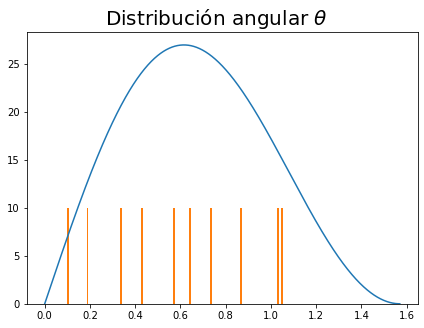

In [10]:
random_th_array = np.array(dict_simulation['Theta_Radianes'])
random_phi_array = np.array(dict_simulation['Phi_radianes'])

fig, axs = plt.subplots(figsize=[7,5])

# Theta
axs.plot(Theta, 70 * Theta_true)
axs.hist(random_th_array, bins = 110)
fig.suptitle(r'Distribución angular $\theta$', y = 0.95, size = 20)

plt.show()

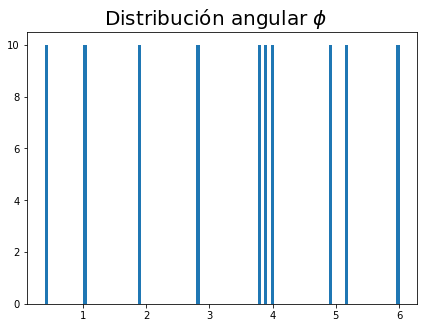

In [11]:
fig, axs = plt.subplots(figsize=[7,5])

# Phi
axs.hist(random_phi_array, bins = 110)
fig.suptitle(r'Distribución angular $\phi$', y = 0.95, size = 20)

plt.show()

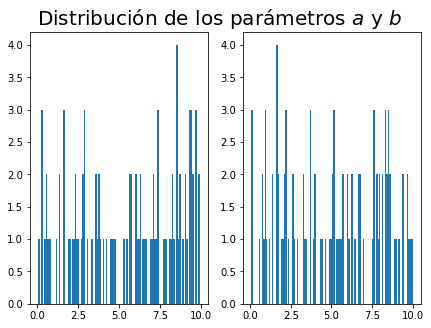

In [17]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=[7,5])

# Parameter a
axs[0].hist(dict_simulation['list_random_a'], bins = 110)
axs[1].hist(dict_simulation['list_random_b'], bins = 110)

fig.suptitle(r'Distribución de los parámetros $a$ y $b$', y = 0.95, size = 20)

plt.show()

In [15]:
dF_dict = pd.DataFrame(dict_simulation)
dF_dict

,Theta_Radianes,Phi_radianes,list_random_a,list_random_b,Points,Energy_per_muon
0,0.862,0.395,8.511,8.577,"[[71.88179426510474], [39.26092951867753], [71...",5893
1,0.862,0.395,6.959,7.747,"[[71.26874754985903], [38.10609813868854], [70...",7489
2,0.862,0.395,9.545,0.111,"[[75.76080486794909], [31.705836439470673], [7...",16407
3,0.862,0.395,4.630,5.606,"[[70.69336481679667], [35.54659566750506], [68...",1601
4,0.862,0.395,9.852,1.690,"[[75.33763752916795], [33.24014523050935], [72...",12205
...,...,...,...,...,...,...
95,1.029,1.883,9.379,8.481,"[[-35.87326177015569], [83.53432389285088], [5...",786
96,1.029,1.883,2.833,6.767,"[[-33.205276251895214], [80.84835637059535], [...",7866
97,1.029,1.883,7.798,0.970,"[[-28.47493128598611], [85.06550459968129], [5...",6477
98,1.029,1.883,7.258,0.159,"[[-27.617603494602168], [85.04960483676852], [...",5357


/tmp/ipykernel_5215/715259870.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  Ax = Axes3D(fig)


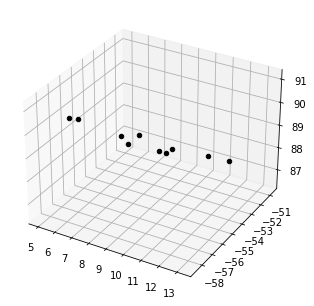

In [4]:
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')
Ax = Axes3D(fig)

theta = np.arange(0, 2 * np.pi, 0.01)
phi = np.arange(0, np.pi/2, 0.01)
theta, phi = np.meshgrid(theta, phi)

# Definimos los datos de prueba
for i in np.arange(0, len(list_points_per_plane[0])):
    x = list_points_per_plane[0][i][0]
    y = list_points_per_plane[0][i][1]
    z = list_points_per_plane[0][i][2]
    # print(list_points_per_plane[0][i][0])
    Ax.scatter(x, y, z, c='k', marker='o')

x_s = Radio * np.sin(phi) * np.cos(theta)
y_s = Radio * np.sin(phi) * np.sin(theta)
z_s = Radio * np.cos(phi)

# Agregamos los puntos en el plano 3D

ax1.plot_surface(x_s, y_s, z_s)

# Mostramos el gráfico
plt.show()


Coordenadas de un punto:  [[(-66.42468627239163, -16.451798687867427, 73.45785154906528)], [(-60.26630990950633, -22.35271884742817, 76.61053175295828)], [(-61.68762406581528, -21.55358526376747, 75.72545104421212)], [(-61.74934936275447, -27.336396882366863, 74.05925657239479)], [(-59.44342574778086, -20.70782071178821, 77.71266042453823)], [(-59.845698349353256, -20.573250075700198, 77.43652534203726)], [(-60.67166564300068, -16.580076239570566, 77.90953949669833)], [(-58.135708277609226, -15.808206513270916, 80.10365633511542)], [(-67.33165514832618, -17.747886073285134, 72.38773171411975)], [(-57.25493781017444, -24.015363743479888, 78.49430683936394)]]


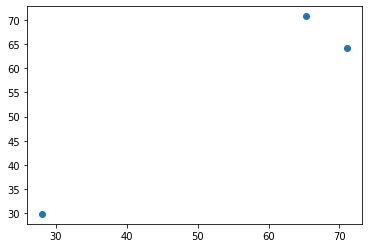

In [5]:
print('Coordenadas de un punto: ', list_points_per_plane[0])
plt.scatter(list_random_plane_point[0], list_random_plane_point[1])

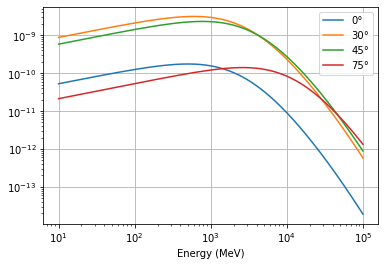

In [89]:
# print(Random_th[0])
E = np.arange(10, 100000, 1)
Thet = [0.0174533, 0.523599, 0.785398, 1.309]     ## En radianes
Ang = [0, 30, 45, 75]

for element in np.arange(0, len(Thet)):
# for element in np.arange(0, 1):
    Energy = dis_energy(E, Thet[element])
    # print(Energy)
    plt.plot(E, Energy, label = str(Ang[element]) + '°')

plt.xlabel('Energy (MeV)')   
plt.grid() 
plt.xscale('log')
plt.yscale('log')
plt.legend()

del Energy 
del E